<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# General Import
import numpy as np
import pandas as pd
from scipy.stats import norm, beta, ttest_ind
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data import
ei_data = pd.read_csv('Data Raja/Raja2.csv', delimiter=';')

In [3]:
# Determinition time intervalls
start_base = 0
end_base   = 17

start_relax = 23
end_relax   = 37

start_attent = 43
end_attent   = 57

start_base_id = int(ei_data.loc[ei_data['Time (s)'] == start_base].index[0])
end_base_id = int(ei_data.loc[ei_data['Time (s)'] == end_base].index[0])

start_relax_id = int(ei_data.loc[ei_data['Time (s)'] == start_relax].index[0])
end_relax_id = int(ei_data.loc[ei_data['Time (s)'] == end_relax].index[0])

start_attent_id = int(ei_data.loc[ei_data['Time (s)'] == start_attent].index[0])
end_attent_id = int(ei_data.loc[ei_data['Time (s)'] == end_attent].index[0])


In [4]:
base = ei_data[start_base_id:end_base_id].values[:,1]
rela = ei_data[start_relax_id:end_relax_id].values[:,1]
atte = ei_data[start_attent_id:end_attent_id].values[:,1]

In [5]:
# Testing of significant differences against each other individually
print(ttest_ind(base.ravel(), rela.ravel()))
print(ttest_ind(base.ravel(), atte.ravel()))
print(ttest_ind(rela.ravel(), atte.ravel()))

Ttest_indResult(statistic=1.1261620234655063, pvalue=0.26230732288820496)
Ttest_indResult(statistic=-1.9965864647988634, pvalue=0.04809638139485811)
Ttest_indResult(statistic=-2.921429030508306, pvalue=0.0042289646763664385)


In [6]:
# Determination of grouping of the calibration sections for decisivness of the EI for gaming
# Option 1 (mostly observed so far)
print(ttest_ind(atte.ravel(),np.hstack((base,rela)).ravel()))

# Option 2
print(ttest_ind(rela.ravel(),np.hstack((base,atte)).ravel()))

# Option 3
print(ttest_ind(rela.ravel(),np.hstack((atte)).ravel()))

# Option 4
print(ttest_ind(base.ravel(),np.hstack((atte)).ravel()))

Ttest_indResult(statistic=2.8579637394903386, pvalue=0.004772267663923616)
Ttest_indResult(statistic=-2.212821865994969, pvalue=0.02818162302928482)
Ttest_indResult(statistic=-2.921429030508306, pvalue=0.0042289646763664385)
Ttest_indResult(statistic=-1.9965864647988634, pvalue=0.04809638139485811)


In [7]:
#Option 1 
params1 = beta.fit(atte.ravel())
params2 = beta.fit(np.hstack((base,rela)).ravel())

# Option 2
#params1 = beta.fit(np.hstack((base, atte)).ravel())
#params2 = beta.fit(rela.ravel())

# Option 3
#params1 = beta.fit(np.hstack((atte)).ravel())
#params2 = beta.fit(rela.ravel())

# Option 4
#params1 = beta.fit(np.hstack((atte)).ravel())
#params2 = beta.fit(base.ravel())


C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Percentile_10 threshold: 		 1.18
Remaining tail_prob atte: 		 0.23
Remaining tail_prob base/rela: 		 0.08
Engagement discrimination factor: 	 2.89


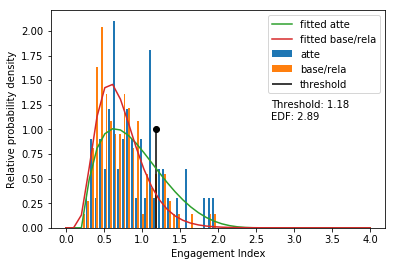

In [11]:
x=np.linspace(0,4,40)

### HISTOGRAMS & PLOTS ###
# Option 1

plt.hist([atte.ravel(),np.hstack((base, rela)).ravel()], 
         bins=30, label=['atte','base/rela'], density=True)
plt.plot(x,beta.pdf(x,params1[0], params1[1], loc=params1[2], scale=params1[3]), label='fitted atte')
plt.plot(x,beta.pdf(x,params2[0], params2[1], loc=params2[2], scale=params2[3]), label='fitted base/rela')
#thres = np.percentile(atte.ravel(),90)
thres = np.percentile(np.hstack((base, rela)).ravel(),90)
tail_prob1_name="atte"
tail_prob2_name="base/rela"


# Option 2
'''
plt.hist([rela.ravel(),np.hstack((base, atte)).ravel()], 
         bins=30, label=['relaxed','base/atte'], density=True)
plt.plot(x,beta.pdf(x,params1[0], params1[1], loc=params1[2], scale=params1[3]), label='fitted base/atte')
plt.plot(x,beta.pdf(x,params2[0], params2[1], loc=params2[2], scale=params2[3]), label='fitted rela')
thres = np.percentile(np.hstack((atte,base)).ravel(),90)
tail_prob1_name="base/atte"
tail_prob2_name="rela"
'''

# Option 3
'''
plt.hist([rela.ravel(),np.hstack((atte)).ravel()], 
         bins=30, label=['relaxed','atte'], density=True)
plt.plot(x,beta.pdf(x,params1[0], params1[1], loc=params1[2], scale=params1[3]), label='fitted atte')
plt.plot(x,beta.pdf(x,params2[0], params2[1], loc=params2[2], scale=params2[3]), label='fitted rela')
thres = np.percentile(atte.ravel(),90)
tail_prob1_name="atte"
tail_prob2_name="rela"
'''

# Option 4
'''
plt.hist([base.ravel(),np.hstack((atte)).ravel()], 
         bins=30, label=['base','atte'], density=True)
plt.plot(x,beta.pdf(x,params1[0], params1[1], loc=params1[2], scale=params1[3]), label='fitted atte')
plt.plot(x,beta.pdf(x,params2[0], params2[1], loc=params2[2], scale=params2[3]), label='fitted base')
thres = np.percentile(atte.ravel(),90)
tail_prob1_name="atte"
tail_prob2_name="base"
'''

### PRINTING ###
tail_prob1 = 1-beta.cdf(thres,params1[0], params1[1], loc=params1[2], scale=params1[3])
tail_prob2 = 1-beta.cdf(thres,params2[0], params2[1], loc=params2[2], scale=params2[3])

print('Percentile_10 threshold: \t\t', np.round(thres,2))
print('Remaining tail_prob {}: \t\t'.format(tail_prob1_name), np.round(tail_prob1,2))
print('Remaining tail_prob {}: \t\t'.format(tail_prob2_name), np.round(tail_prob2,2))
print('Engagement discrimination factor: \t', np.round(tail_prob1 / tail_prob2,2))

plt.vlines(thres,0,1,color='black', label='threshold')
plt.plot(thres,1,'o', color='black')
#plt.title('Engagement Indices during calibration trial')
plt.xlabel('Engagement Index')
plt.ylabel('Relative probability density')
plt.legend()
plt.annotate('Threshold: {}\nEDF: {}'.format(np.round(thres,2), np.round(tail_prob1 / tail_prob2,2)), (2.7,1.1))
plt.show()